In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time as tm

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import keras.backend as K

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('../data/banknotes.csv')
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
X = scale(df.drop('class', axis = 1).values)
y = df['class'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

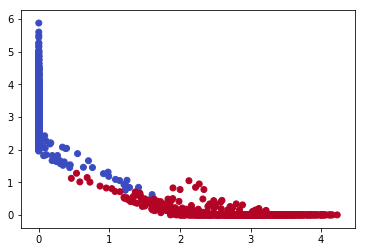

In [96]:
K.clear_session()
model = Sequential()
model.add(Dense(2, input_shape=(4,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(RMSprop(lr=0.1), 'binary_crossentropy', metrics=['accuracy'])
for i in range(5):
    results = model.fit(X_train, y_train, validation_split=0.1, verbose=0, epochs=1)
    #print(confusion_matrix(model.predict_classes(X_test), y_test))
    inp = model.layers[0].input
    out = model.layers[0].output
    ff = K.function([inp], [out])
    feat = ff([X_test])[0]
    plt.scatter(feat[:, 0], feat[:, 1], c=y_test, cmap='coolwarm')
    